# bydeafaultly keras using "MINI-BATCH GD"

In [ ]:
#u can change it to batch or stochastic by updating batch_size
#and note that,,,keras choose batch_size  automatically even if u not mentioned, w.r.t our dataset shape

In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
df = pd.read_csv(r'1_placement.csv')

In [3]:
df.head()

,cgpa,iq,placed
0,7.13,6.22,1
1,1.75,2.73,0
2,9.70,9.69,1
3,6.57,1.78,1
4,5.52,4.21,0


In [4]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [5]:
X

,cgpa,iq
0,7.13,6.22
1,1.75,2.73
2,9.70,9.69
3,6.57,1.78
4,5.52,4.21
...,...,...
95,5.26,2.58
96,2.53,6.15
97,6.00,6.58
98,6.02,2.77


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [7]:
X_scaled.shape

(100, 2)

In [8]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
#X_train.shape

# stochastics GD

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [11]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=500,batch_size=1,validation_split=0.2)#batch_size=1,means each batch contains 1 row.and our dataset X_scaled has 100 rows,thus 100 batches are formed ,and at epoch1 100 times w and b are updated->thus it is stochastic GD
#80/1=>80 times w and b are updated in 1 epoch.....80 batches are formed each batch with 1 row
#validation_split=0.2 -> 80 rows are for traioning and 20 rows for testing/validation
#print(time.time() - start)

#Epoch 1/50
# 80/80  at epoch1 80 rows are processed,out of overall training dataset..training data has 80 rows...bcz we give 20 rows for testing

Epoch 1/500
80/80 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.3750 - val_loss: 0.6677 - val_accuracy: 0.5000
Epoch 2/500
80/80 [==============================] - 0s 1ms/step - loss: 0.6019 - accuracy: 0.5125 - val_loss: 0.6203 - val_accuracy: 0.6500
Epoch 3/500
80/80 [==============================] - 0s 2ms/step - loss: 0.5403 - accuracy: 0.7625 - val_loss: 0.5821 - val_accuracy: 0.9500
Epoch 4/500
80/80 [==============================] - 0s 1ms/step - loss: 0.4875 - accuracy: 0.8875 - val_loss: 0.5491 - val_accuracy: 0.9000
Epoch 5/500
80/80 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.9000 - val_loss: 0.5194 - val_accuracy: 0.9000
Epoch 6/500
80/80 [==============================] - 0s 2ms/step - loss: 0.3950 - accuracy: 0.9125 - val_loss: 0.4864 - val_accuracy: 0.9000
Epoch 7/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3532 - accuracy: 0.9000 - val_loss: 0.4516 - val_accuracy: 0.9000
Epoch 8/500
8

80/80 [==============================] - 0s 2ms/step - loss: 4.5464e-06 - accuracy: 1.0000 - val_loss: 0.8175 - val_accuracy: 0.9000
Epoch 115/500
80/80 [==============================] - 0s 1ms/step - loss: 4.4251e-06 - accuracy: 1.0000 - val_loss: 0.8203 - val_accuracy: 0.9000
Epoch 116/500
80/80 [==============================] - 0s 1ms/step - loss: 4.3240e-06 - accuracy: 1.0000 - val_loss: 0.8210 - val_accuracy: 0.9000
Epoch 117/500
80/80 [==============================] - 0s 1ms/step - loss: 4.2156e-06 - accuracy: 1.0000 - val_loss: 0.8235 - val_accuracy: 0.9000
Epoch 118/500
80/80 [==============================] - 0s 3ms/step - loss: 4.1121e-06 - accuracy: 1.0000 - val_loss: 0.8222 - val_accuracy: 0.9000
Epoch 119/500
80/80 [==============================] - 0s 2ms/step - loss: 4.0361e-06 - accuracy: 1.0000 - val_loss: 0.8235 - val_accuracy: 0.9000
Epoch 120/500
80/80 [==============================] - 0s 3ms/step - loss: 3.9452e-06 - accuracy: 1.0000 - val_loss: 0.8247 - val_ac

Epoch 170/500
80/80 [==============================] - 0s 1ms/step - loss: 1.8971e-06 - accuracy: 1.0000 - val_loss: 0.8704 - val_accuracy: 0.9000
Epoch 171/500
80/80 [==============================] - 0s 1ms/step - loss: 1.8777e-06 - accuracy: 1.0000 - val_loss: 0.8714 - val_accuracy: 0.9000
Epoch 172/500
80/80 [==============================] - 0s 1ms/step - loss: 1.8575e-06 - accuracy: 1.0000 - val_loss: 0.8717 - val_accuracy: 0.9000
Epoch 173/500
80/80 [==============================] - 0s 1ms/step - loss: 1.8402e-06 - accuracy: 1.0000 - val_loss: 0.8728 - val_accuracy: 0.9000
Epoch 174/500
80/80 [==============================] - 0s 1ms/step - loss: 1.8222e-06 - accuracy: 1.0000 - val_loss: 0.8732 - val_accuracy: 0.9000
Epoch 175/500
80/80 [==============================] - 0s 1ms/step - loss: 1.8031e-06 - accuracy: 1.0000 - val_loss: 0.8744 - val_accuracy: 0.9000
Epoch 176/500
80/80 [==============================] - 0s 1ms/step - loss: 1.7868e-06 - accuracy: 1.0000 - val_loss: 0

Epoch 226/500
80/80 [==============================] - 0s 1ms/step - loss: 1.1987e-06 - accuracy: 1.0000 - val_loss: 0.9077 - val_accuracy: 0.9000
Epoch 227/500
80/80 [==============================] - 0s 1ms/step - loss: 1.1909e-06 - accuracy: 1.0000 - val_loss: 0.9080 - val_accuracy: 0.9000
Epoch 228/500
80/80 [==============================] - 0s 2ms/step - loss: 1.1828e-06 - accuracy: 1.0000 - val_loss: 0.9089 - val_accuracy: 0.9000
Epoch 229/500
80/80 [==============================] - 0s 3ms/step - loss: 1.1747e-06 - accuracy: 1.0000 - val_loss: 0.9099 - val_accuracy: 0.9000
Epoch 230/500
80/80 [==============================] - 0s 3ms/step - loss: 1.1677e-06 - accuracy: 1.0000 - val_loss: 0.9101 - val_accuracy: 0.9000
Epoch 231/500
80/80 [==============================] - 0s 2ms/step - loss: 1.1601e-06 - accuracy: 1.0000 - val_loss: 0.9108 - val_accuracy: 0.9000
Epoch 232/500
80/80 [==============================] - 0s 1ms/step - loss: 1.1524e-06 - accuracy: 1.0000 - val_loss: 0

Epoch 282/500
80/80 [==============================] - 0s 1ms/step - loss: 8.7302e-07 - accuracy: 1.0000 - val_loss: 0.9323 - val_accuracy: 0.9000
Epoch 283/500
80/80 [==============================] - 0s 1ms/step - loss: 8.6883e-07 - accuracy: 1.0000 - val_loss: 0.9324 - val_accuracy: 0.9000
Epoch 284/500
80/80 [==============================] - 0s 1ms/step - loss: 8.6512e-07 - accuracy: 1.0000 - val_loss: 0.9329 - val_accuracy: 0.9000
Epoch 285/500
80/80 [==============================] - 0s 1ms/step - loss: 8.6094e-07 - accuracy: 1.0000 - val_loss: 0.9335 - val_accuracy: 0.9000
Epoch 286/500
80/80 [==============================] - 0s 1ms/step - loss: 8.5686e-07 - accuracy: 1.0000 - val_loss: 0.9341 - val_accuracy: 0.9000
Epoch 287/500
80/80 [==============================] - 0s 2ms/step - loss: 8.5261e-07 - accuracy: 1.0000 - val_loss: 0.9345 - val_accuracy: 0.9000
Epoch 288/500
80/80 [==============================] - 0s 2ms/step - loss: 8.4887e-07 - accuracy: 1.0000 - val_loss: 0

Epoch 338/500
80/80 [==============================] - 0s 2ms/step - loss: 6.8747e-07 - accuracy: 1.0000 - val_loss: 0.9517 - val_accuracy: 0.9000
Epoch 339/500
80/80 [==============================] - 0s 3ms/step - loss: 6.8486e-07 - accuracy: 1.0000 - val_loss: 0.9518 - val_accuracy: 0.9000
Epoch 340/500
80/80 [==============================] - 0s 3ms/step - loss: 6.8234e-07 - accuracy: 1.0000 - val_loss: 0.9522 - val_accuracy: 0.9000
Epoch 341/500
80/80 [==============================] - 0s 2ms/step - loss: 6.7955e-07 - accuracy: 1.0000 - val_loss: 0.9527 - val_accuracy: 0.9000
Epoch 342/500
80/80 [==============================] - 0s 2ms/step - loss: 6.7715e-07 - accuracy: 1.0000 - val_loss: 0.9529 - val_accuracy: 0.9000
Epoch 343/500
80/80 [==============================] - 0s 3ms/step - loss: 6.7449e-07 - accuracy: 1.0000 - val_loss: 0.9532 - val_accuracy: 0.9000
Epoch 344/500
80/80 [==============================] - 0s 4ms/step - loss: 6.7199e-07 - accuracy: 1.0000 - val_loss: 0

Epoch 394/500
80/80 [==============================] - 0s 4ms/step - loss: 5.6547e-07 - accuracy: 1.0000 - val_loss: 0.9676 - val_accuracy: 0.9000
Epoch 395/500
80/80 [==============================] - 0s 3ms/step - loss: 5.6371e-07 - accuracy: 1.0000 - val_loss: 0.9680 - val_accuracy: 0.9000
Epoch 396/500
80/80 [==============================] - 0s 2ms/step - loss: 5.6205e-07 - accuracy: 1.0000 - val_loss: 0.9680 - val_accuracy: 0.9000
Epoch 397/500
80/80 [==============================] - 0s 2ms/step - loss: 5.6031e-07 - accuracy: 1.0000 - val_loss: 0.9681 - val_accuracy: 0.9000
Epoch 398/500
80/80 [==============================] - 0s 1ms/step - loss: 5.5853e-07 - accuracy: 1.0000 - val_loss: 0.9683 - val_accuracy: 0.9000
Epoch 399/500
80/80 [==============================] - 0s 1ms/step - loss: 5.5662e-07 - accuracy: 1.0000 - val_loss: 0.9688 - val_accuracy: 0.9000
Epoch 400/500
80/80 [==============================] - 0s 2ms/step - loss: 5.5498e-07 - accuracy: 1.0000 - val_loss: 0

Epoch 450/500
80/80 [==============================] - 0s 1ms/step - loss: 4.7977e-07 - accuracy: 1.0000 - val_loss: 0.9799 - val_accuracy: 0.9000
Epoch 451/500
80/80 [==============================] - 0s 1ms/step - loss: 4.7860e-07 - accuracy: 1.0000 - val_loss: 0.9803 - val_accuracy: 0.9000
Epoch 452/500
80/80 [==============================] - 0s 1ms/step - loss: 4.7703e-07 - accuracy: 1.0000 - val_loss: 0.9803 - val_accuracy: 0.9000
Epoch 453/500
80/80 [==============================] - 0s 2ms/step - loss: 4.7577e-07 - accuracy: 1.0000 - val_loss: 0.9803 - val_accuracy: 0.9000
Epoch 454/500
80/80 [==============================] - 0s 3ms/step - loss: 4.7468e-07 - accuracy: 1.0000 - val_loss: 0.9807 - val_accuracy: 0.9000
Epoch 455/500
80/80 [==============================] - 0s 2ms/step - loss: 4.7320e-07 - accuracy: 1.0000 - val_loss: 0.9806 - val_accuracy: 0.9000
Epoch 456/500
80/80 [==============================] - 0s 2ms/step - loss: 4.7225e-07 - accuracy: 1.0000 - val_loss: 0

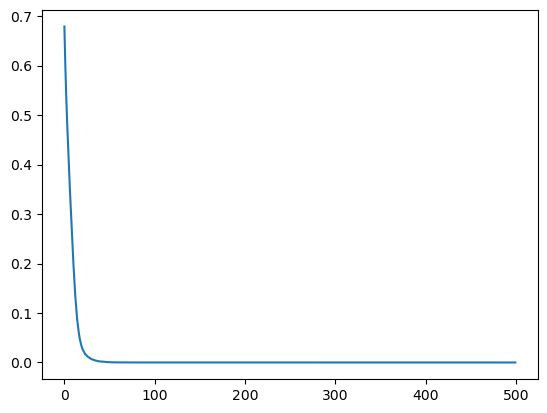

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

# Batch GD

In [15]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=500,batch_size=80,validation_split=0.2)
#80/80=>1 time w and b are updated in 1 epoch......1 batch is formed with 80 row
#print(time.time() - start)

# Epoch 1/50
# 1/1  at each epoch only one time weighhts and biases are updated or we can say 1 time gradient descent is calculated

Epoch 1/500
1/1 [==============================] - 0s 395ms/step - loss: 0.6770 - accuracy: 0.5125 - val_loss: 0.6629 - val_accuracy: 0.7000
Epoch 2/500
1/1 [==============================] - 0s 26ms/step - loss: 0.6692 - accuracy: 0.5125 - val_loss: 0.6599 - val_accuracy: 0.7500
Epoch 3/500
1/1 [==============================] - 0s 40ms/step - loss: 0.6638 - accuracy: 0.5125 - val_loss: 0.6574 - val_accuracy: 0.7500
Epoch 4/500
1/1 [==============================] - 0s 47ms/step - loss: 0.6594 - accuracy: 0.5375 - val_loss: 0.6552 - val_accuracy: 0.7500
Epoch 5/500
1/1 [==============================] - 0s 28ms/step - loss: 0.6556 - accuracy: 0.5750 - val_loss: 0.6533 - val_accuracy: 0.8000
Epoch 6/500
1/1 [==============================] - 0s 46ms/step - loss: 0.6521 - accuracy: 0.5750 - val_loss: 0.6515 - val_accuracy: 0.8000
Epoch 7/500
1/1 [==============================] - 0s 39ms/step - loss: 0.6489 - accuracy: 0.5750 - val_loss: 0.6499 - val_accuracy: 0.8000
Epoch 8/500
1/1 [==

1/1 [==============================] - 0s 30ms/step - loss: 0.4138 - accuracy: 0.9125 - val_loss: 0.5099 - val_accuracy: 0.7500
Epoch 118/500
1/1 [==============================] - 0s 46ms/step - loss: 0.4118 - accuracy: 0.9125 - val_loss: 0.5085 - val_accuracy: 0.7500
Epoch 119/500
1/1 [==============================] - 0s 34ms/step - loss: 0.4099 - accuracy: 0.9125 - val_loss: 0.5070 - val_accuracy: 0.7500
Epoch 120/500
1/1 [==============================] - 0s 34ms/step - loss: 0.4080 - accuracy: 0.9125 - val_loss: 0.5056 - val_accuracy: 0.7500
Epoch 121/500
1/1 [==============================] - 0s 83ms/step - loss: 0.4060 - accuracy: 0.9125 - val_loss: 0.5042 - val_accuracy: 0.7500
Epoch 122/500
1/1 [==============================] - 0s 50ms/step - loss: 0.4041 - accuracy: 0.9125 - val_loss: 0.5027 - val_accuracy: 0.7500
Epoch 123/500
1/1 [==============================] - 0s 33ms/step - loss: 0.4022 - accuracy: 0.9125 - val_loss: 0.5013 - val_accuracy: 0.7500
Epoch 124/500
1/1 [=

Epoch 175/500
1/1 [==============================] - 0s 38ms/step - loss: 0.3040 - accuracy: 0.9375 - val_loss: 0.4300 - val_accuracy: 0.8000
Epoch 176/500
1/1 [==============================] - 0s 36ms/step - loss: 0.3023 - accuracy: 0.9375 - val_loss: 0.4286 - val_accuracy: 0.8000
Epoch 177/500
1/1 [==============================] - 0s 38ms/step - loss: 0.3005 - accuracy: 0.9375 - val_loss: 0.4272 - val_accuracy: 0.8000
Epoch 178/500
1/1 [==============================] - 0s 55ms/step - loss: 0.2987 - accuracy: 0.9375 - val_loss: 0.4258 - val_accuracy: 0.8000
Epoch 179/500
1/1 [==============================] - 0s 56ms/step - loss: 0.2969 - accuracy: 0.9375 - val_loss: 0.4244 - val_accuracy: 0.8000
Epoch 180/500
1/1 [==============================] - 0s 39ms/step - loss: 0.2952 - accuracy: 0.9375 - val_loss: 0.4230 - val_accuracy: 0.8000
Epoch 181/500
1/1 [==============================] - 0s 40ms/step - loss: 0.2934 - accuracy: 0.9375 - val_loss: 0.4215 - val_accuracy: 0.8000
Epoch 

Epoch 233/500
1/1 [==============================] - 0s 36ms/step - loss: 0.2017 - accuracy: 0.9875 - val_loss: 0.3503 - val_accuracy: 0.8000
Epoch 234/500
1/1 [==============================] - 0s 60ms/step - loss: 0.2000 - accuracy: 0.9875 - val_loss: 0.3491 - val_accuracy: 0.8000
Epoch 235/500
1/1 [==============================] - 0s 32ms/step - loss: 0.1983 - accuracy: 0.9875 - val_loss: 0.3478 - val_accuracy: 0.8000
Epoch 236/500
1/1 [==============================] - 0s 45ms/step - loss: 0.1967 - accuracy: 0.9875 - val_loss: 0.3465 - val_accuracy: 0.8000
Epoch 237/500
1/1 [==============================] - 0s 54ms/step - loss: 0.1950 - accuracy: 0.9875 - val_loss: 0.3450 - val_accuracy: 0.8000
Epoch 238/500
1/1 [==============================] - 0s 74ms/step - loss: 0.1934 - accuracy: 0.9875 - val_loss: 0.3437 - val_accuracy: 0.8000
Epoch 239/500
1/1 [==============================] - 0s 42ms/step - loss: 0.1918 - accuracy: 0.9875 - val_loss: 0.3424 - val_accuracy: 0.8000
Epoch 

Epoch 291/500
1/1 [==============================] - 0s 27ms/step - loss: 0.1141 - accuracy: 1.0000 - val_loss: 0.2897 - val_accuracy: 0.8000
Epoch 292/500
1/1 [==============================] - 0s 38ms/step - loss: 0.1129 - accuracy: 1.0000 - val_loss: 0.2888 - val_accuracy: 0.8000
Epoch 293/500
1/1 [==============================] - 0s 38ms/step - loss: 0.1117 - accuracy: 1.0000 - val_loss: 0.2881 - val_accuracy: 0.8000
Epoch 294/500
1/1 [==============================] - 0s 35ms/step - loss: 0.1106 - accuracy: 1.0000 - val_loss: 0.2873 - val_accuracy: 0.8000
Epoch 295/500
1/1 [==============================] - 0s 34ms/step - loss: 0.1094 - accuracy: 1.0000 - val_loss: 0.2866 - val_accuracy: 0.8000
Epoch 296/500
1/1 [==============================] - 0s 37ms/step - loss: 0.1083 - accuracy: 1.0000 - val_loss: 0.2859 - val_accuracy: 0.8000
Epoch 297/500
1/1 [==============================] - 0s 34ms/step - loss: 0.1072 - accuracy: 1.0000 - val_loss: 0.2852 - val_accuracy: 0.8000
Epoch 

Epoch 349/500
1/1 [==============================] - 0s 142ms/step - loss: 0.0614 - accuracy: 1.0000 - val_loss: 0.2617 - val_accuracy: 0.8500
Epoch 350/500
1/1 [==============================] - 0s 41ms/step - loss: 0.0608 - accuracy: 1.0000 - val_loss: 0.2614 - val_accuracy: 0.8500
Epoch 351/500
1/1 [==============================] - 0s 39ms/step - loss: 0.0601 - accuracy: 1.0000 - val_loss: 0.2611 - val_accuracy: 0.8500
Epoch 352/500
1/1 [==============================] - 0s 37ms/step - loss: 0.0595 - accuracy: 1.0000 - val_loss: 0.2608 - val_accuracy: 0.8500
Epoch 353/500
1/1 [==============================] - 0s 39ms/step - loss: 0.0589 - accuracy: 1.0000 - val_loss: 0.2605 - val_accuracy: 0.8500
Epoch 354/500
1/1 [==============================] - 0s 35ms/step - loss: 0.0583 - accuracy: 1.0000 - val_loss: 0.2602 - val_accuracy: 0.8500
Epoch 355/500
1/1 [==============================] - 0s 34ms/step - loss: 0.0576 - accuracy: 1.0000 - val_loss: 0.2600 - val_accuracy: 0.8500
Epoch

Epoch 407/500
1/1 [==============================] - 0s 23ms/step - loss: 0.0331 - accuracy: 1.0000 - val_loss: 0.2491 - val_accuracy: 0.8500
Epoch 408/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0327 - accuracy: 1.0000 - val_loss: 0.2498 - val_accuracy: 0.8500
Epoch 409/500
1/1 [==============================] - 0s 42ms/step - loss: 0.0323 - accuracy: 1.0000 - val_loss: 0.2490 - val_accuracy: 0.8500
Epoch 410/500
1/1 [==============================] - 0s 88ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 0.2497 - val_accuracy: 0.8500
Epoch 411/500
1/1 [==============================] - 0s 65ms/step - loss: 0.0317 - accuracy: 1.0000 - val_loss: 0.2490 - val_accuracy: 0.8500
Epoch 412/500
1/1 [==============================] - 0s 187ms/step - loss: 0.0313 - accuracy: 1.0000 - val_loss: 0.2497 - val_accuracy: 0.8500
Epoch 413/500
1/1 [==============================] - 0s 47ms/step - loss: 0.0310 - accuracy: 1.0000 - val_loss: 0.2491 - val_accuracy: 0.8500
Epoch

Epoch 465/500
1/1 [==============================] - 0s 33ms/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.2595 - val_accuracy: 0.9000
Epoch 466/500
1/1 [==============================] - 0s 36ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.2602 - val_accuracy: 0.9000
Epoch 467/500
1/1 [==============================] - 0s 34ms/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 0.2597 - val_accuracy: 0.9000
Epoch 468/500
1/1 [==============================] - 0s 39ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.2608 - val_accuracy: 0.9000
Epoch 469/500
1/1 [==============================] - 0s 36ms/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.2603 - val_accuracy: 0.9000
Epoch 470/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.2616 - val_accuracy: 0.9000
Epoch 471/500
1/1 [==============================] - 0s 64ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.2611 - val_accuracy: 0.9000
Epoch 

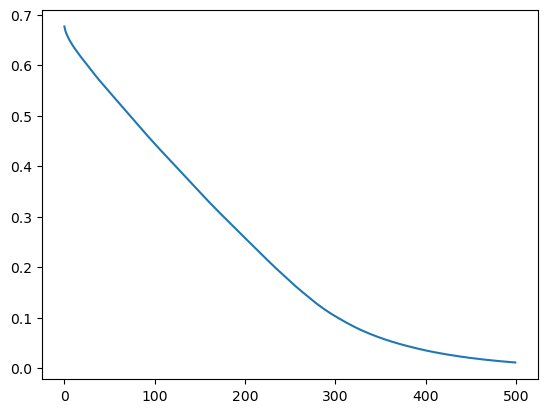

In [17]:
plt.plot(history.history['loss'])

In [18]:
#as u see,,for epochs=50,,,stochastic gd gives more accuracy comare to batch gd,,but batch gd train faster....
#but we want accuracy bro...so consider stochastic gd

# mini batch GD

In [19]:
#do urself

In [20]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=500,batch_size=16,validation_split=0.2)
#80/16=>5 times w and b are updated in 1 epoch......5 batches are formed with 16 row each
#ie;after seeing 16 rows or 1 batch 5 times w and b are updated,,,,thats why we said minibatch is in b/n batch and stochastic GD

Epoch 1/500
5/5 [==============================] - 0s 30ms/step - loss: 0.6127 - accuracy: 0.6125 - val_loss: 0.6860 - val_accuracy: 0.5500
Epoch 2/500
5/5 [==============================] - 0s 15ms/step - loss: 0.5883 - accuracy: 0.6500 - val_loss: 0.6728 - val_accuracy: 0.5500
Epoch 3/500
5/5 [==============================] - 0s 14ms/step - loss: 0.5710 - accuracy: 0.6625 - val_loss: 0.6614 - val_accuracy: 0.6500
Epoch 4/500
5/5 [==============================] - 0s 8ms/step - loss: 0.5560 - accuracy: 0.6625 - val_loss: 0.6518 - val_accuracy: 0.7000
Epoch 5/500
5/5 [==============================] - 0s 12ms/step - loss: 0.5422 - accuracy: 0.6875 - val_loss: 0.6426 - val_accuracy: 0.7000
Epoch 6/500
5/5 [==============================] - 0s 11ms/step - loss: 0.5289 - accuracy: 0.7250 - val_loss: 0.6334 - val_accuracy: 0.7000
Epoch 7/500
5/5 [==============================] - 0s 7ms/step - loss: 0.5156 - accuracy: 0.7375 - val_loss: 0.6242 - val_accuracy: 0.6500
Epoch 8/500
5/5 [=====

5/5 [==============================] - 0s 10ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.3441 - val_accuracy: 0.9000
Epoch 118/500
5/5 [==============================] - 0s 10ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.3487 - val_accuracy: 0.9000
Epoch 119/500
5/5 [==============================] - 0s 10ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.3501 - val_accuracy: 0.9000
Epoch 120/500
5/5 [==============================] - 0s 8ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.3530 - val_accuracy: 0.9000
Epoch 121/500
5/5 [==============================] - 0s 17ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.3557 - val_accuracy: 0.9000
Epoch 122/500
5/5 [==============================] - 0s 15ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.3569 - val_accuracy: 0.9000
Epoch 123/500
5/5 [==============================] - 0s 10ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.3599 - val_accuracy: 0.9000
Epoch 124/500
5/5 [==

5/5 [==============================] - 0s 10ms/step - loss: 1.0957e-04 - accuracy: 1.0000 - val_loss: 0.6150 - val_accuracy: 0.9000
Epoch 231/500
5/5 [==============================] - 0s 7ms/step - loss: 1.0919e-04 - accuracy: 1.0000 - val_loss: 0.6154 - val_accuracy: 0.9000
Epoch 232/500
5/5 [==============================] - 0s 6ms/step - loss: 1.0543e-04 - accuracy: 1.0000 - val_loss: 0.6165 - val_accuracy: 0.9000
Epoch 233/500
5/5 [==============================] - 0s 7ms/step - loss: 1.0564e-04 - accuracy: 1.0000 - val_loss: 0.6186 - val_accuracy: 0.9000
Epoch 234/500
5/5 [==============================] - 0s 11ms/step - loss: 1.0341e-04 - accuracy: 1.0000 - val_loss: 0.6181 - val_accuracy: 0.9000
Epoch 235/500
5/5 [==============================] - 0s 10ms/step - loss: 1.0135e-04 - accuracy: 1.0000 - val_loss: 0.6189 - val_accuracy: 0.9000
Epoch 236/500
5/5 [==============================] - 0s 10ms/step - loss: 9.9087e-05 - accuracy: 1.0000 - val_loss: 0.6211 - val_accuracy: 0.

5/5 [==============================] - 0s 4ms/step - loss: 3.3824e-05 - accuracy: 1.0000 - val_loss: 0.6974 - val_accuracy: 0.9000
Epoch 343/500
5/5 [==============================] - 0s 8ms/step - loss: 3.3656e-05 - accuracy: 1.0000 - val_loss: 0.6979 - val_accuracy: 0.9000
Epoch 344/500
5/5 [==============================] - 0s 11ms/step - loss: 3.3335e-05 - accuracy: 1.0000 - val_loss: 0.6980 - val_accuracy: 0.9000
Epoch 345/500
5/5 [==============================] - 0s 14ms/step - loss: 3.3159e-05 - accuracy: 1.0000 - val_loss: 0.6989 - val_accuracy: 0.9000
Epoch 346/500
5/5 [==============================] - 0s 15ms/step - loss: 3.2937e-05 - accuracy: 1.0000 - val_loss: 0.7000 - val_accuracy: 0.9000
Epoch 347/500
5/5 [==============================] - 0s 11ms/step - loss: 3.2679e-05 - accuracy: 1.0000 - val_loss: 0.7003 - val_accuracy: 0.9000
Epoch 348/500
5/5 [==============================] - 0s 10ms/step - loss: 3.2469e-05 - accuracy: 1.0000 - val_loss: 0.7005 - val_accuracy: 0

5/5 [==============================] - 0s 10ms/step - loss: 1.8798e-05 - accuracy: 1.0000 - val_loss: 0.7407 - val_accuracy: 0.9000
Epoch 455/500
5/5 [==============================] - 0s 10ms/step - loss: 1.8579e-05 - accuracy: 1.0000 - val_loss: 0.7411 - val_accuracy: 0.9000
Epoch 456/500
5/5 [==============================] - 0s 8ms/step - loss: 1.8692e-05 - accuracy: 1.0000 - val_loss: 0.7418 - val_accuracy: 0.9000
Epoch 457/500
5/5 [==============================] - 0s 10ms/step - loss: 1.8429e-05 - accuracy: 1.0000 - val_loss: 0.7419 - val_accuracy: 0.9000
Epoch 458/500
5/5 [==============================] - 0s 10ms/step - loss: 1.8367e-05 - accuracy: 1.0000 - val_loss: 0.7423 - val_accuracy: 0.9000
Epoch 459/500
5/5 [==============================] - 0s 3ms/step - loss: 1.8454e-05 - accuracy: 1.0000 - val_loss: 0.7424 - val_accuracy: 0.9000
Epoch 460/500
5/5 [==============================] - 0s 11ms/step - loss: 1.8213e-05 - accuracy: 1.0000 - val_loss: 0.7425 - val_accuracy: 0